#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\Ahmed\OneDrive\Desktop\Salaries.csv")
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1. Basic Data Exploration:
*Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.*

In [4]:
print('The number of columns is: {0} \nThe number of rows is: {1}'.format(df.shape[0], df.shape[1]))

The number of columns is: 148654 
The number of rows is: 13


In [5]:
# Numebr of nulls for each column:
print('The number of nulls for each column:\n{0}\
       \n\nAnd the ratio of nulls per column: \n{1}'.format(df.isna().sum(), round(df.isna().sum()/df.isna().count(), 2)))

The number of nulls for each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64       

And the ratio of nulls per column: 
Id                  0.00
EmployeeName        0.00
JobTitle            0.00
BasePay             0.00
OvertimePay         0.00
OtherPay            0.00
Benefits            0.24
TotalPay            0.00
TotalPayBenefits    0.00
Year                0.00
Notes               1.00
Agency              0.00
Status              1.00
dtype: float64


### *We can see that Both Notes & Status columns doesn't include any data so we can drop them safely.*

In [6]:
df.drop(columns = ['Notes', 'Status'], inplace = True)

In [7]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


# 2. Descriptive Statistics:
*Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.*
- *We will consider that the salary is the total mony the employee takes from the company so we can say that Salary is `TotalPayBenefits`.*
- *Renaming `TotalPayBenefits` to `TotalSalary`*

In [8]:
df.rename(columns={'TotalPayBenefits': 'TotalSalary'}, inplace = True)

In [9]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalSalary,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [10]:
print('median: ',round(df['TotalSalary'].median(), 2))
print('mode: ',round(df['TotalSalary'].mode(), 2))

median:  92404.09
mode:  0    7959.18
dtype: float64


In [11]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalSalary,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


*We should make some cleaning to these data!*

In [12]:
# Sorting values by TotalSalary descending:
df.sort_values(by = ['TotalSalary']).head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalSalary,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,San Francisco
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
148633,148634,Edward Ferdinand,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148632,148633,Sharon D Owens-Webster,Protective Services Worker,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148631,148632,Andre M Johnson,Communications Dispatcher 1,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148630,148631,Randy J Keys,Carpenter,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


*'`Nan`' values in each of `Benefits`, `BasePay`, `OtherPay`, and `OvertimePay` might be refering to that the employee had zero benefits, zero in otherPay, zero overtime pay due to not working any overtime hours. We can also understand zero BasePay, it might be refering to an intern or so.*

In [13]:
# zeroing Null values in benefits, OtherPay, basepay, and otherpay

df['Benefits'].loc[df['Benefits'].isnull()]=0
df['BasePay'].loc[df['BasePay'].isnull()]=0
df['OtherPay'].loc[df['OtherPay'].isnull()]=0
df['OvertimePay'].loc[df['OvertimePay'].isnull()]=0

C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


*Now, It's very ubnormal to have a negative `OtherPay`, and `Benefits` but we can't just delete these values until we make sure these were not intentional values as they might be taxes, or panalties.

(array([4.3795e+04, 5.1446e+04, 3.5668e+04, 1.3825e+04, 3.4280e+03,
        3.8700e+02, 8.9000e+01, 1.2000e+01, 2.0000e+00, 2.0000e+00]),
 array([  -618.13 ,  56203.226, 113024.582, 169845.938, 226667.294,
        283488.65 , 340310.006, 397131.362, 453952.718, 510774.074,
        567595.43 ]),
 <BarContainer object of 10 artists>)

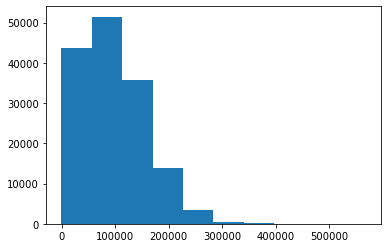

In [14]:
plt.hist(df['TotalSalary'])

In [15]:
meanval = df['TotalSalary'].mean()
stdval = df['TotalSalary'].std(ddof=0)

In [16]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalSalary,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.669115,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.515703,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.170000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [17]:
stdval

62793.32227587377

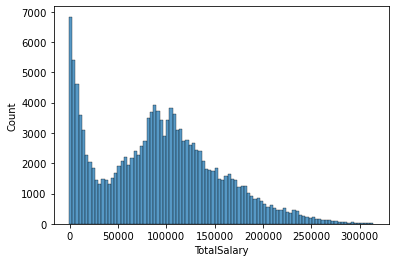

In [18]:
# Drawing the values betwee -5sigmaz and +5sigmaz in z-score
sns.histplot(df['TotalSalary'][(df['TotalSalary'] <= 5*stdval) & (df['TotalSalary'] >= -5*stdval)]);

*From the histogram we see that the most occured value is zero with about 7k instances, then the number of people started to decrease as we go to the 25k and then rises again to reach a local peak at about 100k and then decreases again the more the salary increaes.*

In [19]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [20]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalSalary,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [21]:
# Defining a regex pattern to extract the departments
pattern = re.compile(r'\((.*?)\)')
departments = []
for i, v in enumerate(df['JobTitle']):
    matches = pattern.search(v)

    if matches:
        department = matches.group(1)
        departments.append(department)
    else:
        departments.append('No Department')

In [22]:
# Use Counter to count occurrences of each department
department_counts = Counter(departments)
dep_name = []
dep_count = []
# Print the counts
for department, count in department_counts.items():
    print(f"{department}: {count}")
    dep_name.append(department)
    dep_count.append(count)

No Department: 146060
POLICE DEPARTMENT: 667
FIRE DEPARTMENT: 52
CIVIL & CRIMINAL: 8
CIVIL/CRIMINAL: 377
MFCC: 90
SEASONAL: 30
Fire Dept: 25
Cvl&Crmnl: 9
Civil & Criminal: 14
SFERS: 64
Police Department: 45
Civil/Criminal: 1126
Seasonal: 86
Fire Department: 1


*We can see that the majority of the employees doesn't have a department or wasn't listed in their job title. So we will ignore them in the distribution.*

*We can also see that `Police Department` and `CIVIL & CRIMINAL` departments are written with different names so we can just sum them up.*

In [23]:
# Removing the No Departments:

department_counts = dict(department_counts)
# department_counts.pop('No Department')

# Summing up the equaivelents and removing the redundancies:
department_counts['Civil & Criminal'] = department_counts['Civil & Criminal']+\
                                        department_counts['CIVIL/CRIMINAL']+\
                                        department_counts['Cvl&Crmnl']+\
                                        department_counts['Civil/Criminal']
department_counts.pop('Civil & Criminal')
department_counts.pop('CIVIL/CRIMINAL')
department_counts.pop('Cvl&Crmnl')
department_counts.pop('Civil/Criminal')

########################
department_counts['Police Department'] = department_counts['Police Department']+\
                                        department_counts['POLICE DEPARTMENT']

department_counts.pop('POLICE DEPARTMENT')

########################
department_counts['FIRE DEPARTMENT'] = department_counts['FIRE DEPARTMENT']+\
                                        department_counts['Fire Dept']+1

department_counts.pop('Fire Dept')
department_counts.pop('Fire Department')

########################
department_counts['SEASONAL'] = department_counts['SEASONAL']+\
                                        department_counts['Seasonal']

department_counts.pop('Seasonal')

86

In [24]:
print(department_counts)

{'No Department': 146060, 'FIRE DEPARTMENT': 78, 'CIVIL & CRIMINAL': 8, 'MFCC': 90, 'SEASONAL': 116, 'SFERS': 64, 'Police Department': 712}


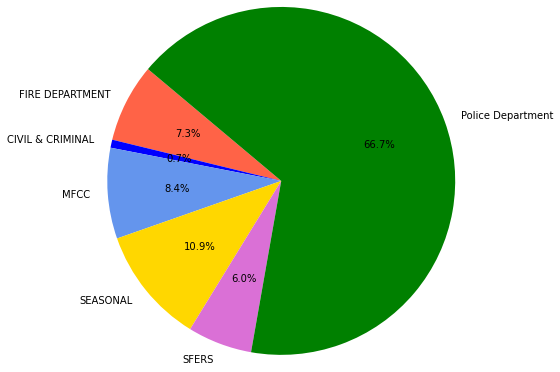

In [37]:
department_counts.pop('No Department')
labels = department_counts.keys()
sizes = department_counts.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, radius=2, colors=['tomato', 'blue', 'cornflowerblue', 'gold', 'orchid', 'green']);

*The police Department has the highest percentage out of all the employees. This might indicate that this is a police office company or a security company or so.*

*Not included department doesn't mean that they dont have a department. So we will use another approach to try to find a better accuracy.*

In [81]:
tot_sal = pd.DataFrame(df.groupby(by = ['JobTitle'])['TotalSalary'].sum()/df.groupby(by = ['JobTitle'])['TotalSalary'].count())
tot_sal.reset_index(inplace=True)

tot_sal.sort_values(by = ['TotalSalary'], ascending=False).head(10)

,JobTitle,TotalSalary
466,Chief Investment Officer,436224.360000
474,Chief of Police,411732.266667
475,"Chief, Fire Department",408865.326667
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
838,"Gen Mgr, Public Trnsp Dept",380696.440000
621,"Dep Dir for Investments, Ret",355731.260000
1214,Mayor,354212.906667
124,"Adm, SFGH Medical Center",347079.706667
514,Controller,343061.140000
206,Asst Chf of Dept (Fire Dept),342597.550556


*This distribution is a little more realistic.*

In [27]:
print('Salaries per year:')
df.groupby(by = ['Year'])['TotalSalary'].sum()

Salaries per year:


Year
2011    2.594195e+09
2012    3.696940e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalSalary, dtype: float64

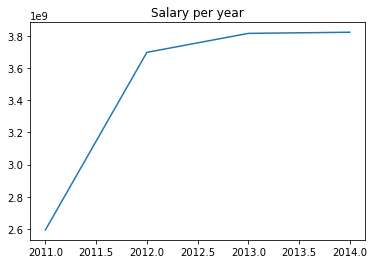

In [28]:
plt.plot(df.groupby(by = ['Year'])['TotalSalary'].sum())
plt.title('Salary per year');

*We can see a jump in salary in `2012`, and a very slight increase in `2013`, and then settled in `2014`.*

In [29]:
np.correlate(df['Year'], df['TotalSalary'])

array([2.80315437e+13])

*the value indicates a very large positive correlation*

*There is no *

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


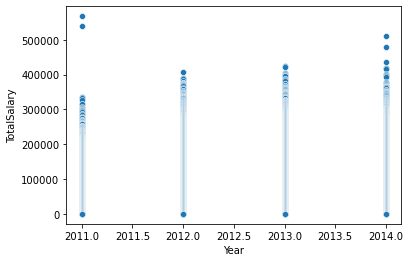

In [33]:
sns.scatterplot(df['Year'], df['TotalSalary']);

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


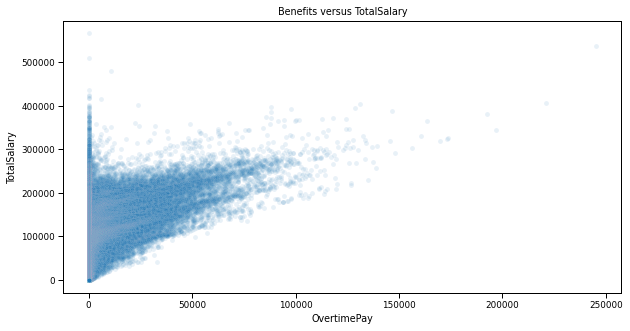

In [77]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df['OvertimePay'], df['TotalSalary'], alpha=0.1)
plt.title("Benefits versus TotalSalary");

*We see a moderate positive correlation between OvertimePay and Total Salary.*

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


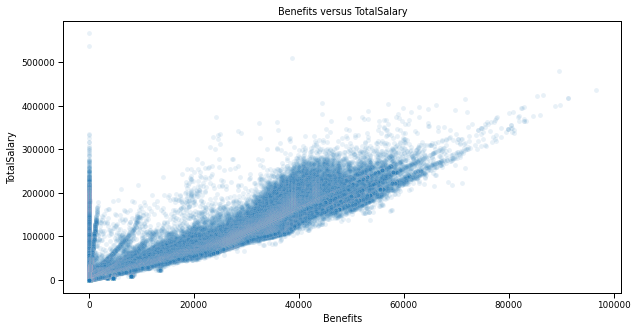

In [78]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Benefits'], df['TotalSalary'], alpha=0.1)
plt.title("Benefits versus TotalSalary");

*This is ver obvious strong positive correlation between the Benefits and TotalSalary, the bigger the salary the bigger the Benefits.*

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


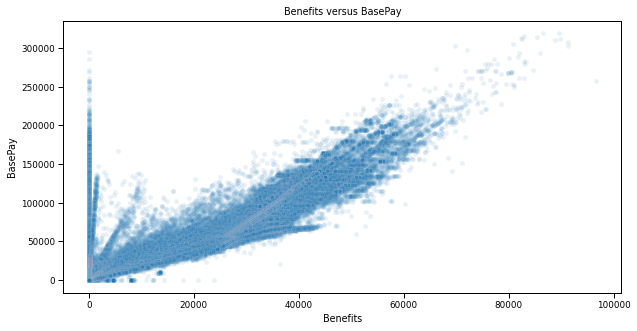

In [79]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df['Benefits'], df['BasePay'], alpha=0.1)
plt.title("Benefits versus BasePay");

*Same here with the BasePay strong positive correlation between Benefits and BasePay.*

### Some insights:

- Major changes must be done to the DataBase system as there are alot of important data are missing and not easily extracted with a better chance to have more effecient results. Most importantly, the department id should be separate from the job title column and should have a separate relation.
- There are some values that should be double checked like the negetive values of `TotalPay`, `Benefits`, etc. and if were not outliars then should have a better way for repersenting these data like making a separate column for taxes, penalties, and also internships.

- This organization has a variety of jobs and workers from all the domains and fields, like: FireFighters, Transit Operators, Police officers, Custodian, etc. All of these positions doesn't relate to a specific domain for the company it's more likely to be a governmental data for a city or so.
- Salaries of the workers had a signeficant increase between 2011 and 2012 with more than **42%**, and then almost settled after **2012**.
- `Chief Investment Officers` are the more likely ones that have the largest share of salaries with an average of about **436224 USD**, followed by `Chief, Fire Department` with about **411732 USD**.
- Unsurprisingly there is a **strong** positive correlation between `BasePay` and `Benefits` and `TotalSalary` which can be seen clearly from the scatter plot, but a **moderate** positive correlation between `OvertimePay` and `TotalSalary`.